In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [43]:
import sys
import os

# Add the project root to sys.path (adjust the path as needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.append(project_root)

# Now try to import the DataIngestion class
from src.components.data_ingestion import DataIngestion

# Initialize the DataIngestion object
ingestion = DataIngestion()

# Load data from the database

df_routes = ingestion.load_dataframe('routes_table')

# Display the data
print(df_routes.head())


Connected to database: postgres


AttributeError: 'Engine' object has no attribute 'cursor'

In [5]:
# path1=r"C:\Truck_Delay_Classification\Data\raw_data\training_data\routes_table.csv"
# df=pd.read_csv(path1)
# df

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22
...,...,...,...,...,...
2347,R-cc900a65,C-594514f8,C-2e349ccd,8283.93,165.68
2348,R-64f64afb,C-594514f8,C-56b68559,272.90,5.46
2349,R-0e0ac567,C-594514f8,C-328bd8d3,172.74,3.45
2350,R-5ccd3200,C-594514f8,C-841ebdcb,960.93,19.22


In [6]:
df.shape

(2352, 5)

In [7]:
df.info

<bound method DataFrame.info of         route_id   origin_id destination_id  distance  average_hours
0     R-ada2a391  C-927ceb5e     C-56e39a5e   1735.06          34.70
1     R-ae0ef31f  C-927ceb5e     C-73ae5412   1498.24          29.96
2     R-4beec5fd  C-927ceb5e     C-4fe0fa24   6078.46         121.57
3     R-8d7a7fb2  C-927ceb5e     C-451776b7   1543.01          30.86
4     R-b236e347  C-927ceb5e     C-d80a1e7d    310.75           6.22
...          ...         ...            ...       ...            ...
2347  R-cc900a65  C-594514f8     C-2e349ccd   8283.93         165.68
2348  R-64f64afb  C-594514f8     C-56b68559    272.90           5.46
2349  R-0e0ac567  C-594514f8     C-328bd8d3    172.74           3.45
2350  R-5ccd3200  C-594514f8     C-841ebdcb    960.93          19.22
2351  R-38a366a9  C-594514f8     C-e6dcda92    472.61           9.45

[2352 rows x 5 columns]>

In [8]:
df.describe

<bound method NDFrame.describe of         route_id   origin_id destination_id  distance  average_hours
0     R-ada2a391  C-927ceb5e     C-56e39a5e   1735.06          34.70
1     R-ae0ef31f  C-927ceb5e     C-73ae5412   1498.24          29.96
2     R-4beec5fd  C-927ceb5e     C-4fe0fa24   6078.46         121.57
3     R-8d7a7fb2  C-927ceb5e     C-451776b7   1543.01          30.86
4     R-b236e347  C-927ceb5e     C-d80a1e7d    310.75           6.22
...          ...         ...            ...       ...            ...
2347  R-cc900a65  C-594514f8     C-2e349ccd   8283.93         165.68
2348  R-64f64afb  C-594514f8     C-56b68559    272.90           5.46
2349  R-0e0ac567  C-594514f8     C-328bd8d3    172.74           3.45
2350  R-5ccd3200  C-594514f8     C-841ebdcb    960.93          19.22
2351  R-38a366a9  C-594514f8     C-e6dcda92    472.61           9.45

[2352 rows x 5 columns]>

In [9]:
df.head()

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22


#Step 2: Handling the missing data

In [10]:
print(df.isnull().sum())

route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
dtype: int64


Hence there are no missing values in the data

In [11]:
#Removing the duplicate values

In [12]:
df.duplicated().sum()

np.int64(0)

Hence there are no duplicate values in the dataset

array([[<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'average_hours'}>]], dtype=object)

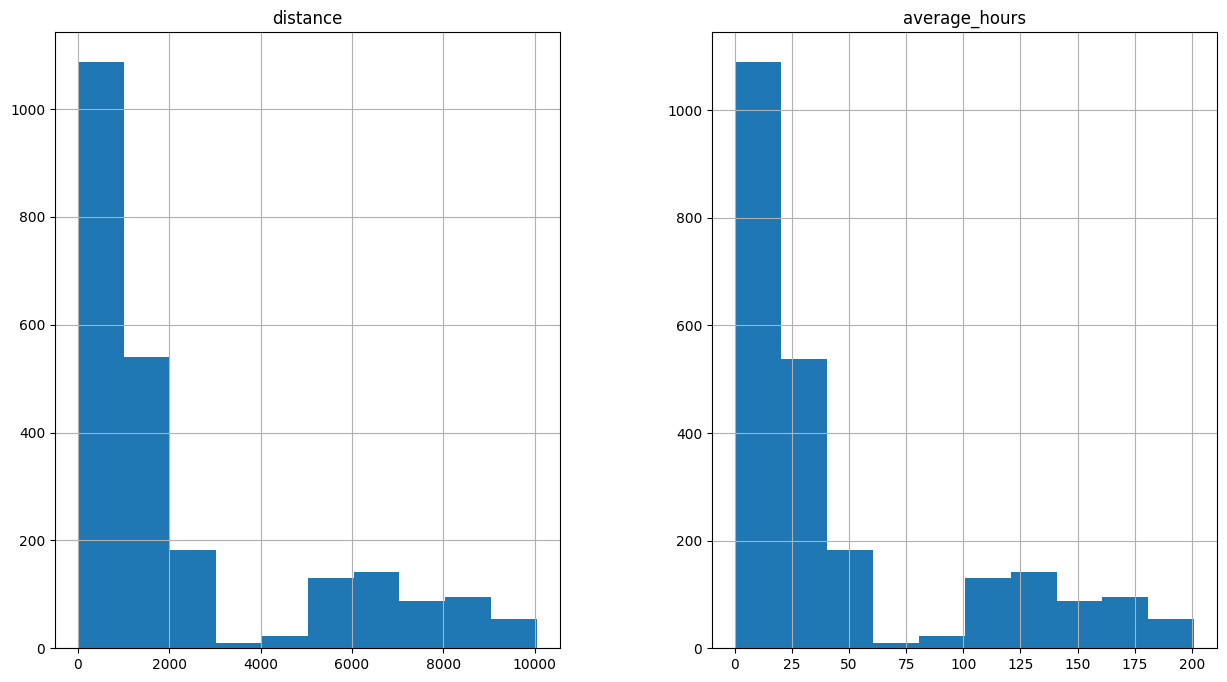

In [13]:
#Understanding the data
df.hist(figsize=(15,8))

In [14]:
df['distance'].value_counts().count()

np.int64(1174)

In [15]:
df['distance'].value_counts()

distance
641.57     4
664.12     4
1810.21    2
5092.06    2
440.71     2
          ..
8244.93    2
734.12     2
557.55     2
457.43     2
1543.01    2
Name: count, Length: 1174, dtype: int64

<Axes: ylabel='distance'>

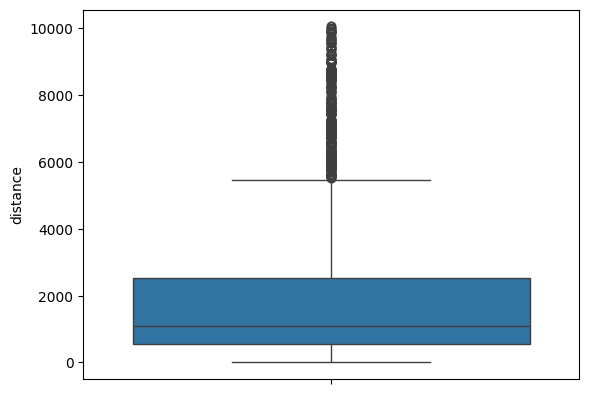

In [16]:
sns.boxplot(y=df['distance'])

In [17]:
df['average_hours'].value_counts().count()

np.int64(1080)

In [18]:
df['average_hours'].value_counts()

average_hours
7.62      6
3.86      6
15.11     6
9.56      6
19.76     6
         ..
9.60      2
168.90    2
5.08      2
4.18      2
21.02     2
Name: count, Length: 1080, dtype: int64

<Axes: ylabel='average_hours'>

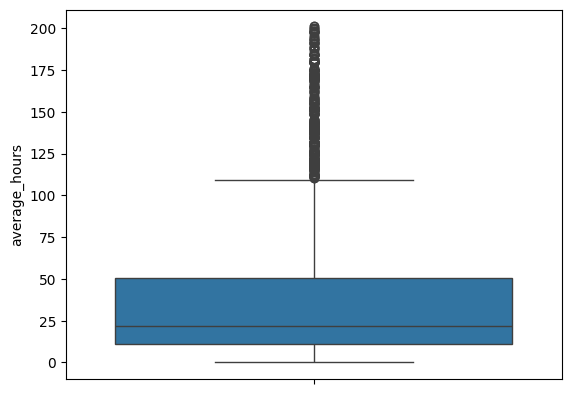

In [19]:
sns.boxplot(y=df['average_hours'])

In [20]:
# Columns from where outliers need to be removed
columns_to_check = ['average_hours','distance']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)

        route_id   origin_id destination_id  distance  average_hours
0     R-ada2a391  C-927ceb5e     C-56e39a5e   1735.06          34.70
1     R-ae0ef31f  C-927ceb5e     C-73ae5412   1498.24          29.96
3     R-8d7a7fb2  C-927ceb5e     C-451776b7   1543.01          30.86
4     R-b236e347  C-927ceb5e     C-d80a1e7d    310.75           6.22
5     R-93f348a8  C-927ceb5e     C-c92599e2   1810.21          36.20
...          ...         ...            ...       ...            ...
2346  R-88d4c432  C-594514f8     C-90e30162    578.31          11.57
2348  R-64f64afb  C-594514f8     C-56b68559    272.90           5.46
2349  R-0e0ac567  C-594514f8     C-328bd8d3    172.74           3.45
2350  R-5ccd3200  C-594514f8     C-841ebdcb    960.93          19.22
2351  R-38a366a9  C-594514f8     C-e6dcda92    472.61           9.45

[1810 rows x 5 columns]


In [22]:

df3 = df_cleaned

# Adding a new index column with a different name
df3.insert(0, 'RowIndex', range(1, 1 + len(df3)))

# Display the DataFrame with the new index column
print(df3)

      RowIndex    route_id   origin_id destination_id  distance  average_hours
0            1  R-ada2a391  C-927ceb5e     C-56e39a5e   1735.06          34.70
1            2  R-ae0ef31f  C-927ceb5e     C-73ae5412   1498.24          29.96
3            3  R-8d7a7fb2  C-927ceb5e     C-451776b7   1543.01          30.86
4            4  R-b236e347  C-927ceb5e     C-d80a1e7d    310.75           6.22
5            5  R-93f348a8  C-927ceb5e     C-c92599e2   1810.21          36.20
...        ...         ...         ...            ...       ...            ...
2346      1806  R-88d4c432  C-594514f8     C-90e30162    578.31          11.57
2348      1807  R-64f64afb  C-594514f8     C-56b68559    272.90           5.46
2349      1808  R-0e0ac567  C-594514f8     C-328bd8d3    172.74           3.45
2350      1809  R-5ccd3200  C-594514f8     C-841ebdcb    960.93          19.22
2351      1810  R-38a366a9  C-594514f8     C-e6dcda92    472.61           9.45

[1810 rows x 6 columns]


In [26]:
df3['event_time']= pd.to_datetime('2024-09-17')

In [28]:
df3

,RowIndex,route_id,origin_id,destination_id,distance,average_hours,event_time
0,1,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70,2024-09-17
1,2,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96,2024-09-17
3,3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86,2024-09-17
4,4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22,2024-09-17
5,5,R-93f348a8,C-927ceb5e,C-c92599e2,1810.21,36.20,2024-09-17
...,...,...,...,...,...,...,...
2346,1806,R-88d4c432,C-594514f8,C-90e30162,578.31,11.57,2024-09-17
2348,1807,R-64f64afb,C-594514f8,C-56b68559,272.90,5.46,2024-09-17
2349,1808,R-0e0ac567,C-594514f8,C-328bd8d3,172.74,3.45,2024-09-17
2350,1809,R-5ccd3200,C-594514f8,C-841ebdcb,960.93,19.22,2024-09-17


In [29]:
!pip install hopsworks


In [30]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043610
2024-09-19 14:27:31,829 WARNING: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead

2024-09-19 14:27:31,831 WARNING: using legacy validation callback
Connected. Call `.close()` to terminate connection gracefully.


In [31]:
routes_table_fg = fs.get_or_create_feature_group(
    name="routes_table",
    version=1,
    description="routes_table",
    online_enabled=True,
    primary_key=['RowIndex'],
    event_time='event_time',
    
)

In [32]:
routes_table_fg.insert(df3)

2024-09-19 14:28:51,977 WARNING: FeatureGroupWarning: The ingested dataframe contains upper case letters in feature names: `['RowIndex']`. Feature names are sanitized to lower case in the feature store.

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1043610/fs/1035337/fg/1203544


Uploading Dataframe: 0.00% |          | Rows 0/1810 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: routes_table_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/1043610/jobs/named/routes_table_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x2483b3dbf80>, None)

In [27]:
# df3.to_csv('df3.csv', index=False)